# Automating Drug Prescription with SVM 

In the pharmaceutical industry, doctors often need to prescribe the correct drug based on a patient's unique medical profile. Factors such as age, sex, blood pressure, cholesterol levels, and sodium-to-potassium ratio (Na_to_K) influence the choice of drug. However, determining the most effective drug can sometimes be complex, especially when multiple factors interact in subtle ways.

Machine learning, specifically Support Vector Machines (SVM), can assist in this decision-making process by learning patterns from past data and making accurate drug predictions for new patients based on their characteristics.

Imagine you are a data scientist working at a pharmaceutical company. The company has developed a system that collects patient data (such as age, sex, blood pressure, cholesterol levels, and sodium-to-potassium ratio) when they visit their healthcare providers. Currently, healthcare professionals manually decide which drug is best for each patient based on this information.

The pharmaceutical company wants to enhance this process by automating it with machine learning. Your task is to create an SVM model that can predict the most suitable drug for a patient based on their profile. This model will be used in the company's healthcare app to assist doctors in prescribing drugs more efficiently and accurately.

Problem and Goals:
1. Data Understanding and Cleaning:

Understand the dataset, including features such as age, sex, BP, cholesterol, and the sodium-to-potassium ratio.
Preprocess the data, handling categorical variables and scaling numerical features as SVM is sensitive to feature scaling.

2. Exploratory Data Analysis (EDA):

Visualize the distribution of the patient features.
Understand correlations between features, like how age, cholesterol, and blood pressure relate to each other.

3. Model Development and Training:

Train an initial SVM model with the Radial Basis Function (RBF) kernel to classify patients into drug categories.
Use the model to predict the drug type based on patient data.

4. Evaluation:

Evaluate the model using accuracy, precision, and recall metrics, and examine the confusion matrix to understand how well the model is classifying patients into the correct drug categories.

5. Hyperparameter Tuning:

Perform hyperparameter tuning using GridSearchCV to find the optimal values for SVM parameters such as C, gamma, and kernel.
Retrain the model with the best hyperparameters and reevaluate its performance.

In [6]:
print("Hello, Begin Your Data Journey")

Hello, Begin Your Data Journey


In [7]:
!pip3 install matplotlib
!pip3 install sklearn
!pip3 install seaborn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import warnings
warnings.filterwarnings("ignore")

jupyter_notebook_dataset = os.getenv("dataset_url", "https://d3dyfaf3iutrxo.cloudfront.net/general/upload/b51c040b6cc8414c8d74bdbed0173506.csv")
data = pd.read_csv(jupyter_notebook_dataset)


In [9]:
data


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [10]:
# Display the first few rows of the dataset to understand its structure
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [11]:
# Display the shape of the dataset (rows, columns)
data.shape


(200, 6)

In [12]:
# Generate descriptive statistics to understand the range, mean, and other info of each feature
data.describe()


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [13]:
# Step 2: Data quality check
# Checking for missing values
data.isnull().any()


Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

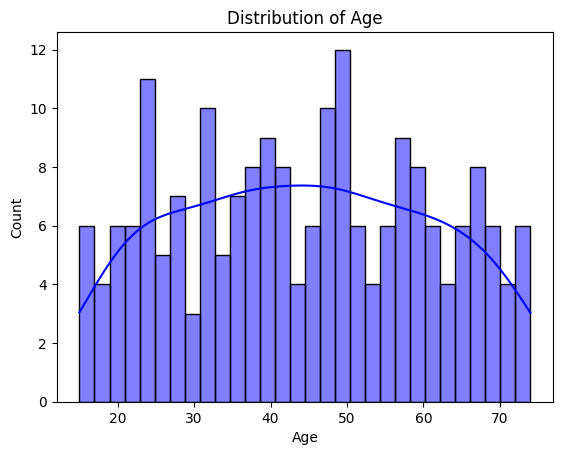

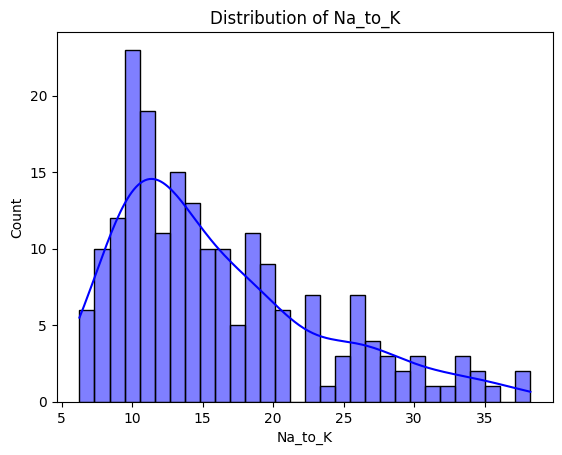

In [14]:
# Visualize distributions for each feature
# Plot histogram with a kernel density estimate for each Numerical columns
# Plot count of each Categorical columns
numerical_columns = ['Age', 'Na_to_K']
for column in numerical_columns:
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.show()
    

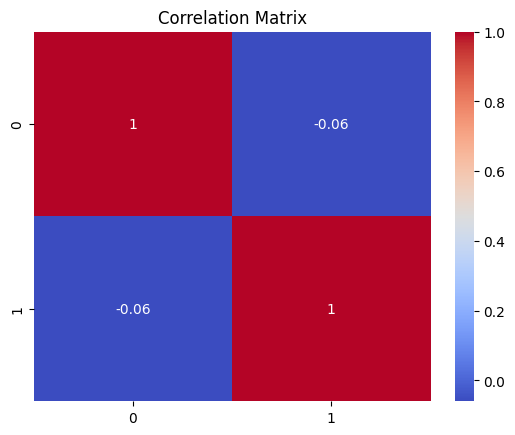

In [15]:
# Correlation matrix for numerical columns to see the linear relationships between features
# Select numerical columns only
# Calculate correlation matrix
# Plot heatmap with correlation values

cor = np.corrcoef(data['Age'], data['Na_to_K']).round(2)
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [16]:
# 3. Data Preprocessing
# Encode categorical variables into numeric format using LabelEncoder

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

data['Sex'] = le.fit_transform(data['Sex']) 
data['BP'] = le.fit_transform(data['BP']) 
data['Cholesterol'] = le.fit_transform(data['Cholesterol']) 
data['Drug'] = le.fit_transform(data['Drug']) 



In [17]:
# Split features and target
X = data.iloc[:, :-1] 
y = data.iloc[:, -1] 


In [18]:
# Scale features (important for SVM because it is sensitive to feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

X_scaled = sc.fit_transform(X) 



In [19]:
# 4. Train-Test Split
# Split the data into training and testing sets (80% train, 20% test) set random_state = 42 & stratify = y

from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2) 




In [20]:
# 5. Initial SVM model (using RBF kernel)
# Train the initial SVM model with default parameters and RBF kernel & random_state=42

svc = SVC(kernel='rbf', C=1, gamma='scale', random_state=42) 
svc.fit(X_train, y_train) 



SVC(C=1, random_state=42)

In [21]:
# 6. Evaluate initial model
# Make predictions on the test set

y_pred = svc.predict(X_test) 


In [22]:
# Calculate and display the accuracy score and store it in a variable 'accuracy'
def get_accuracy():  
    ans = accuracy_score(y_test, y_pred)
    return ans # replace with actual accuracy


In [23]:
accuracy = get_accuracy()
accuracy


0.9

In [24]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate precision take average='weighted'
precision = precision_score(y_test, y_pred,average='weighted')

# Calculate recall take average='weighted'
recall = recall_score(y_test, y_pred, average='weighted') 

# Calculate F1-score take average='weighted'
F1_score = f1_score(y_test, y_pred, average='weighted') 




In [25]:
# 7. Hyperparameter Tuning using GridSearchCV
# Define the parameter grid for tuning

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

k = 5
cv = KFold(n_splits=k, random_state = 42 , shuffle = True)
ksvc = SVC()
param_svc = {'C':[0.01, 0.1, 1,2,3,4,5,10,20,50,100], 'kernel':['linear', 'rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}




In [26]:
# Perform hyperparameter tuning using GridSearchCV take random_state=42 cv=5 n_jobs=-1

ksvc_GSCV = GridSearchCV(ksvc, param_grid = param_svc,n_jobs=-1, cv = cv)
ksvc_GSCV.fit(X_train, y_train)
ksvc_GSCV.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [27]:
# Print the best parameters found by GridSearchCV and the best cross-validation score
print(ksvc_GSCV.best_params_)


{'C': 10, 'gamma': 1, 'kernel': 'linear'}


In [28]:
# 8. Train final model with best parameters
# Train the SVM model with the best parameters found from GridSearchCV

ksvc_GSCV.fit(X_train, y_train)



GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 2, 3, 4, 5, 10, 20, 50, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [29]:
# 9. Evaluate final model
# Make predictions on the test set with the final model and evaluate its performance
y_gs_pred = ksvc_GSCV.predict(X_test) 



In [30]:
# Calculate and display the accuracy score and store it in a variable 'accuracy_final'
def get_accuracy_final():  
    ans = accuracy_score(y_test, y_pred) 
    return ans # replace with actual accuracy


In [31]:
accuracy_final = get_accuracy_final()
accuracy_final


0.9

In [32]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_gs_pred) 

# Calculate precision take average='weighted'
precision_gs = precision_score(y_test, y_gs_pred, average='weighted') 

# # Calculate recall take average='weighted'
recall_gs = recall_score(y_test, y_gs_pred, average='weighted') 

# # Calculate F1-score take average='weighted'
F1_score = f1_score(y_test, y_gs_pred, average='weighted') 

